# Importation des bibliothèques

In [1]:
import sys
sys.path.insert(0, '..')

In [3]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from sequentiel import Sequentiel , Optim
from loss  import MSELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Génération des données

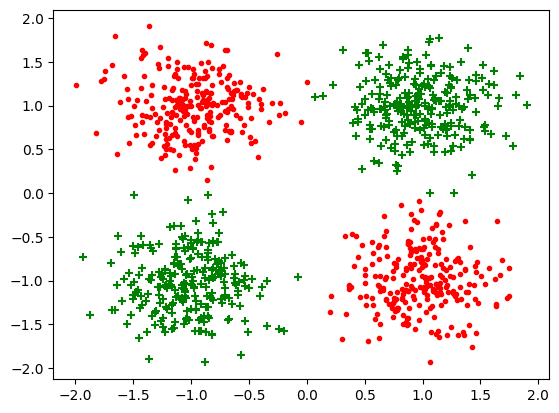

In [8]:
np.random.seed(0)
n_samples = 1000

X , y = ut.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=n_samples, data_type=1, epsilon=0.1)
y[y == -1] = 0 

ut.plot_data(X, y)

# Test du module sequentiel

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print("X ", X.shape)
print('Train :', X_train.shape)
print('Test :', X_test.shape)

X  (1000, 2)
Train : (800, 2)
Test : (200, 2)


In [ ]:
loss = MSELoss()

output_size = 50
output_size_2 = 20
output_size_3 = 1

batch_size = 10
epochs = 1000

module_1 = Module_lineare( X.shape[1], output_size,True)
module_2= Module_lineare(output_size, output_size_2,True)
module_3 = Module_lineare(output_size_2, output_size_3,True)

# sig = Sigmoid()
# tan = TanH()

sig = None
tan = None

network = Sequentiel([module_1 , tan , module_2 , tan , module_3 , sig])

optimizer = Optim(network , loss , eps = 1e-3)
optimizer.SGD(X_train , y_train , batch_size , 1000)